In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt

In [2]:
# comparing S&P 500, Nasdaq, German market, and Britain market
tickers = ['^GSPC','^IXIC','^GDAXI','^FTSE']
yfin.pdr_override() #  you ensure compatibility with the Yahoo Finance API changes and possibly improve the reliability and functionality of data retrieval from Yahoo Finance within your code
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = pdr.get_data_yahoo(t, start="2003-1-1", end="2024-3-23")['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5342 entries, 2003-01-02 to 2024-03-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   5342 non-null   float64
 1   ^IXIC   5342 non-null   float64
 2   ^GDAXI  5256 non-null   float64
 3   ^FTSE   5244 non-null   float64
dtypes: float64(4)
memory usage: 208.7 KB


In [4]:
mydata.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2003-01-02,909.030029,1384.849976,3105.040039,4009.500000
2003-01-03,908.590027,1387.079956,3092.939941,4005.000000
2003-01-06,929.010010,1421.319946,3157.250000,4001.399902
2003-01-07,922.929993,1431.569946,3112.770020,3957.399902
2003-01-08,909.929993,1401.069946,2993.000000,3924.800049


In [5]:
mydata.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2024-03-18,5149.419922,16103.450195,17932.679688,7722.600098
2024-03-19,5178.509766,16166.790039,17987.490234,7738.299805
2024-03-20,5224.620117,16369.410156,18015.130859,7737.399902
2024-03-21,5241.529785,16401.839844,18179.250000,7882.600098
2024-03-22,5234.180176,16428.820312,18205.939453,7930.899902


In [6]:
# price at t=0
S = mydata.iloc[0]

In [7]:
# simple rate of return for each index
simple_return = (mydata/mydata.shift(1)) - 1
simple_return

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,-0.000484,0.001610,-0.003897,-0.001122
2003-01-06,0.022474,0.024685,0.020793,-0.000899
2003-01-07,-0.006545,0.007212,-0.014088,-0.010996
2003-01-08,-0.014086,-0.021305,-0.038477,-0.008238
...,...,...,...,...
2024-03-18,0.006318,0.008156,-0.000221,-0.000621
2024-03-19,0.005649,0.003933,0.003056,0.002033
2024-03-20,0.008904,0.012533,0.001537,-0.000116


In [8]:
simple_return[np.isnan(simple_return)] = 0
simple_return

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2003-01-02,0.000000,0.000000,0.000000,0.000000
2003-01-03,-0.000484,0.001610,-0.003897,-0.001122
2003-01-06,0.022474,0.024685,0.020793,-0.000899
2003-01-07,-0.006545,0.007212,-0.014088,-0.010996
2003-01-08,-0.014086,-0.021305,-0.038477,-0.008238
...,...,...,...,...
2024-03-18,0.006318,0.008156,-0.000221,-0.000621
2024-03-19,0.005649,0.003933,0.003056,0.002033
2024-03-20,0.008904,0.012533,0.001537,-0.000116


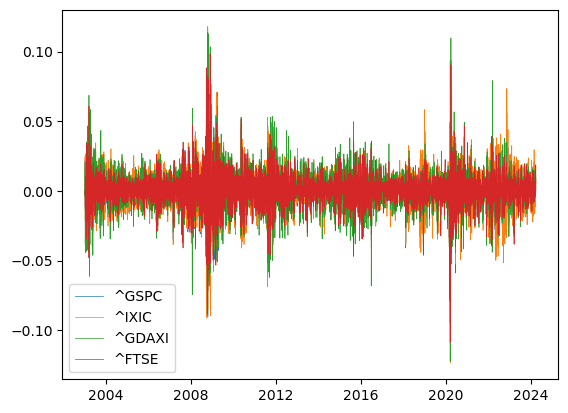

In [9]:
fig,ax = plt.subplots()
data_points = ax.plot(simple_return, linewidth=0.5)
ax.legend( ['^GSPC','^IXIC','^GDAXI','^FTSE'])

In [10]:
annual_returns = np.average(simple_return,axis=0)*250
print('annual rate of return:')
for i in range(len(annual_returns)):
    print(tickers[i], ': ', annual_returns[i])

annual rate of return:
^GSPC :  0.09979321843598
^IXIC :  0.13876132114000672
^GDAXI :  0.09047028073621953
^FTSE :  0.03970855689892117


In [11]:
# graphical representation

<AxesSubplot:xlabel='Date'>

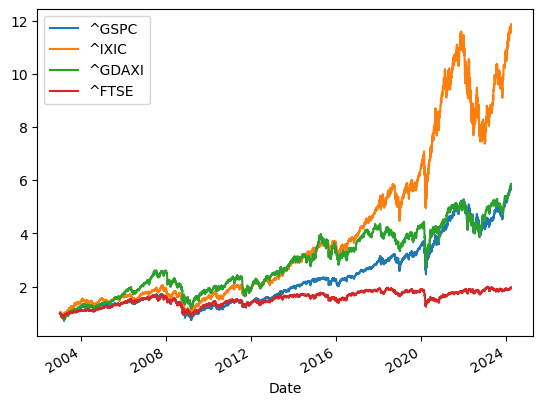

In [12]:
normalized_price = mydata/mydata.iloc[0]
normalized_price.plot()